In [1]:
import pandas as pd
from pyspark import SparkConf, SparkContext
from pyspark.sql import HiveContext

conf = (SparkConf().set("spark.kryoserializer.buffer.max", "512m"))

sc.stop()
sc = SparkContext(conf=conf)
sqlContext = SQLContext.getOrCreate(sc)


In [2]:
#Create a Hive Context

hive_context = HiveContext(sc)

#print “Reading Hive table…”
sparkdf = hive_context. sql("SELECT lang as Language,deviceused,COUNT(*)as NoOfUsers from tweets_record3 WHERE lang in('en','es','fr')and" +       " deviceused in('Twitter for Android','Twitter for iPhone','Twitter Web App') GROUP BY lang,deviceused  ORDER BY lang,deviceused DESC")
#print “Registering DataFrame as a table…”

sparkdf.show() # Show first rows of dataframe


+--------+-------------------+---------+
|Language|         deviceused|NoOfUsers|
+--------+-------------------+---------+
|      en| Twitter for iPhone|    16868|
|      en|Twitter for Android|    13436|
|      en|    Twitter Web App|     6246|
|      es| Twitter for iPhone|     1919|
|      es|Twitter for Android|     4652|
|      es|    Twitter Web App|     1203|
|      fr| Twitter for iPhone|     1229|
|      fr|Twitter for Android|      710|
|      fr|    Twitter Web App|      355|
+--------+-------------------+---------+



<Figure size 2304x1152 with 0 Axes>

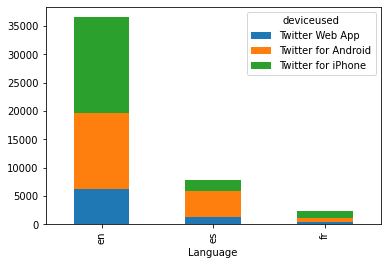

In [3]:
import pandas as pd
from pandas import DataFrame

import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt

pdf1=sparkdf.toPandas()
plt.figure(figsize=(32,16))
#pdf1.plot(kind='barh',x='deviceused',y='NoOfUsers',colormap='winter_r')
(pdf1.pivot_table(index='Language', columns='deviceused', values='NoOfUsers', aggfunc='sum', fill_value=0).plot.bar(stacked=True))
#pdf1.plot(kind="bar") 


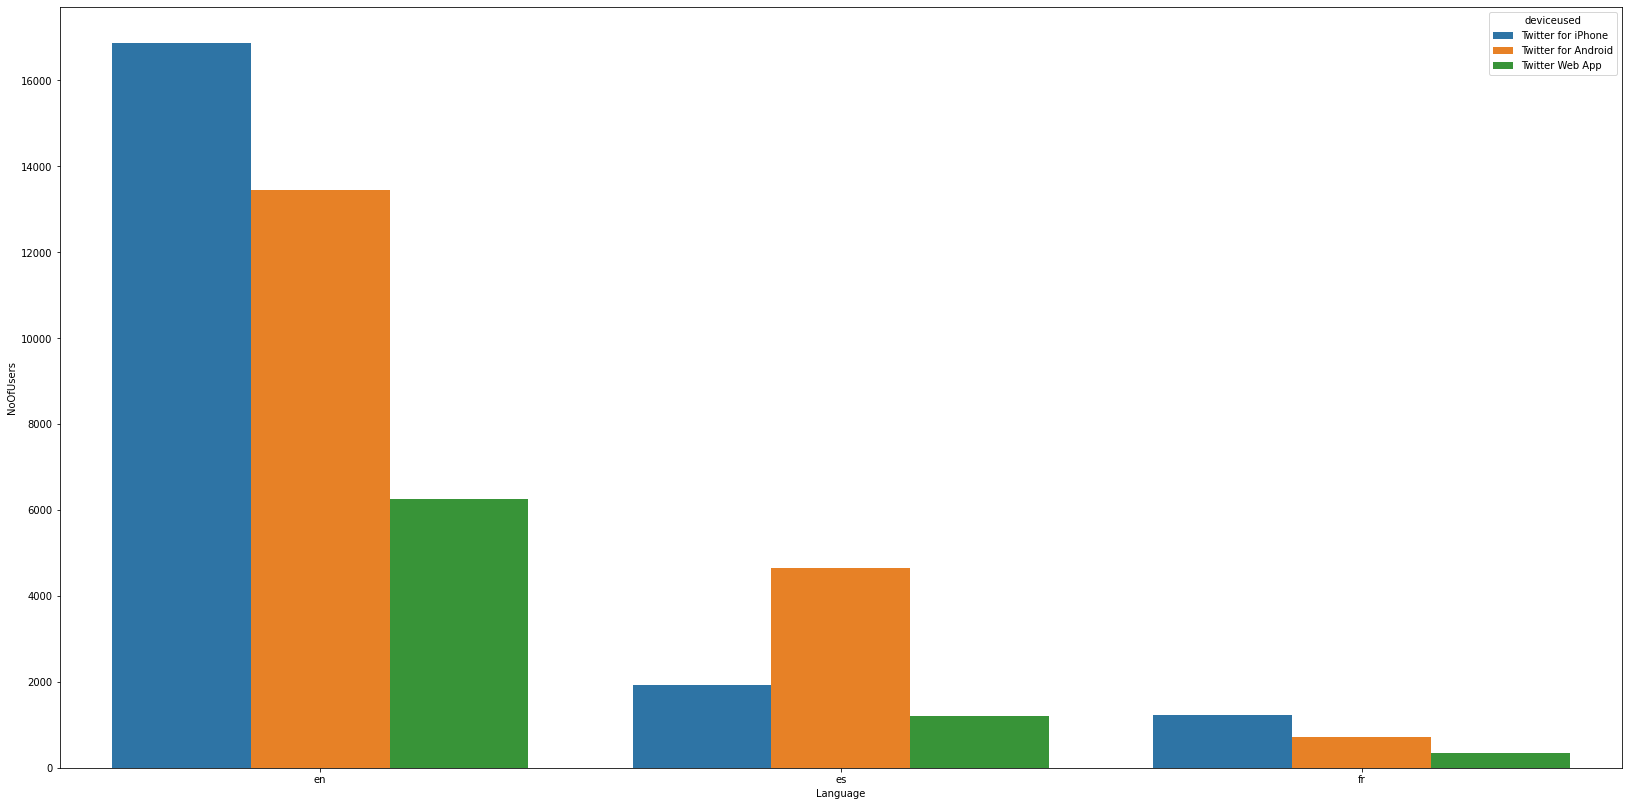

In [37]:
import pandas as pd
from pandas import DataFrame

import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
pdf1=sparkdf.toPandas()
plt.figure(figsize=(28,14))
sns.barplot(x='Language', y='NoOfUsers', hue='deviceused', data=pdf1, saturation=0.8)

In [25]:
hive_context = HiveContext(sc)

#print “Reading Hive table…”
sparkdf1 = hive_context.sql("SELECT lang,COUNT(*)as tweeters from tweets_record3 GROUP BY lang ORDER BY tweeters DESC LIMIT 5")
#print “Registering DataFrame as a table…”

sparkdf1.show() # Show first rows of dataframe

+----+--------+
|lang|tweeters|
+----+--------+
|  en|   39022|
|  ja|   26921|
|  th|   11044|
| und|   10059|
|  es|    8039|
+----+--------+



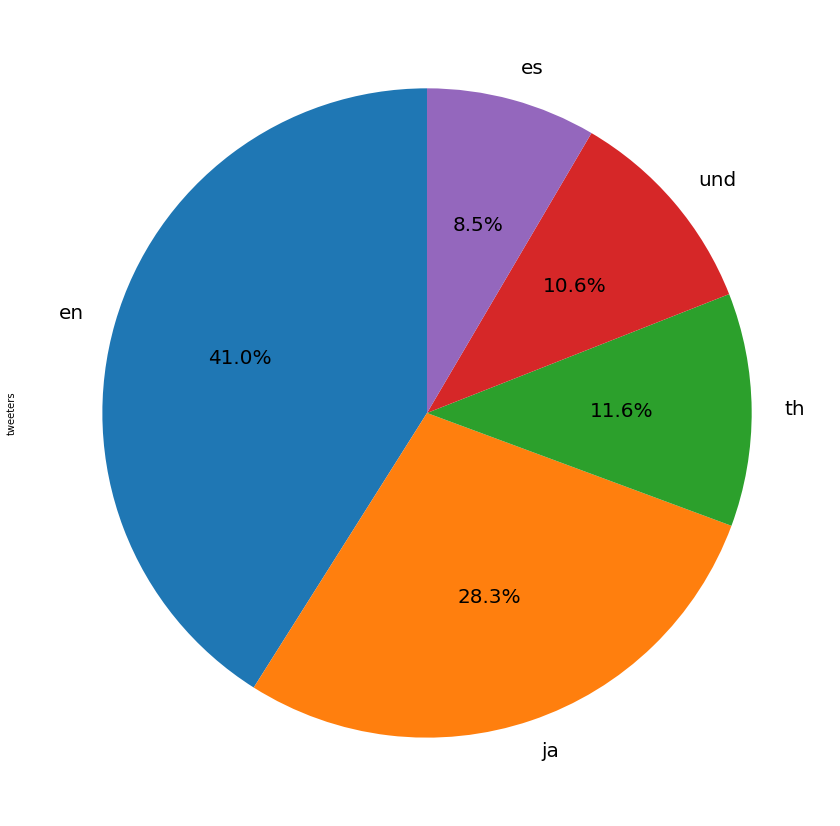

In [34]:
import pandas as pd
from pandas import DataFrame

import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
pdf1=sparkdf1.toPandas()
plt.figure(figsize=(32,16))
ax1 = plt.subplot(121, aspect='equal')
pdf1.plot(kind='pie', y = 'tweeters', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=pdf1['lang'], legend = False, fontsize=20)

plt.show()